# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 17.09.2019

Мягкий дедлайн: 23:59MSK 29.09.2019 (за каждый день просрочки снимается 2 балла)

Жесткий дедлайн: 23:59MSK 02.10.2019

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а также привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

<strong style="color: red">Внимание!</strong> В этом ноутбуке используется библиотека `ipyleaflet`. Чтобы ее установить так, чтобы она работала, нужно совершить 2 простых шага:

In [ ]:
!pip install git+https://github.com/python-visualization/folium

После этого перезапустите сессию (не `Restart Kernel`, а нажмите `Ctrl+C` в терминале, где вы запускали ноутбук, и запустите заново). Лучше это сделать сразу, чтобы потом не пришлось прерывать сессию и терять промежуточные результаты работы. Если все сделано правильно, вы должны увидеть карту Москвы, выполнив ячейку ниже:

In [ ]:
from folium import Map
Map(location=(55.7522200, 37.6155600), zoom_start=13)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [ ]:
data = pd.read_csv("taxi_train.csv", index_col="id")

In [ ]:
data.shape

(1458644, 10)

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [ ]:
data.drop("dropoff_datetime", axis=1, inplace=True)
data.head()

vendor_id      pickup_datetime  ...  store_and_fwd_flag  trip_duration
id                                         ...                                   
id2875421          2  2016-03-14 17:24:55  ...                   N            455
id2377394          1  2016-06-12 00:43:35  ...                   N            663
id3858529          2  2016-01-19 11:35:24  ...                   N           2124
id3504673          2  2016-04-06 19:32:31  ...                   N            429
id2181028          2  2016-03-26 13:30:55  ...                   N            435

[5 rows x 9 columns]

In [ ]:
data['pickup_datetime'] =  pd.to_datetime(data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
data.head()

vendor_id     pickup_datetime  ...  store_and_fwd_flag  trip_duration
id                                        ...                                   
id2875421          2 2016-03-14 17:24:55  ...                   N            455
id2377394          1 2016-06-12 00:43:35  ...                   N            663
id3858529          2 2016-01-19 11:35:24  ...                   N           2124
id3504673          2 2016-04-06 19:32:31  ...                   N            429
id2181028          2 2016-03-26 13:30:55  ...                   N            435

[5 rows x 9 columns]

In [ ]:
data.dtypes

vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [ ]:
data["log_trip_duration"] = np.log1p(data["trip_duration"])
data.head()

vendor_id     pickup_datetime  ...  trip_duration  log_trip_duration
id                                        ...                                  
id2875421          2 2016-03-14 17:24:55  ...            455           6.122493
id2377394          1 2016-06-12 00:43:35  ...            663           6.498282
id3858529          2 2016-01-19 11:35:24  ...           2124           7.661527
id3504673          2 2016-04-06 19:32:31  ...            429           6.063785
id2181028          2 2016-03-26 13:30:55  ...            435           6.077642

[5 rows x 10 columns]

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Разбейте выборку на обучающую и тестовую в отношении 7:3.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(data, test_size=0.3, random_state=241)
train.head()

vendor_id     pickup_datetime  ...  trip_duration  log_trip_duration
id                                        ...                                  
id3309865          2 2016-04-06 18:37:09  ...            951           6.858565
id0666054          1 2016-03-05 11:58:12  ...            681           6.525030
id2902202          2 2016-06-15 20:33:42  ...           1054           6.961296
id1480584          2 2016-06-28 15:37:05  ...           1155           7.052721
id3877378          1 2016-04-17 12:40:40  ...              8           2.197225

[5 rows x 10 columns]

In [ ]:
train.shape

(1021050, 10)

Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

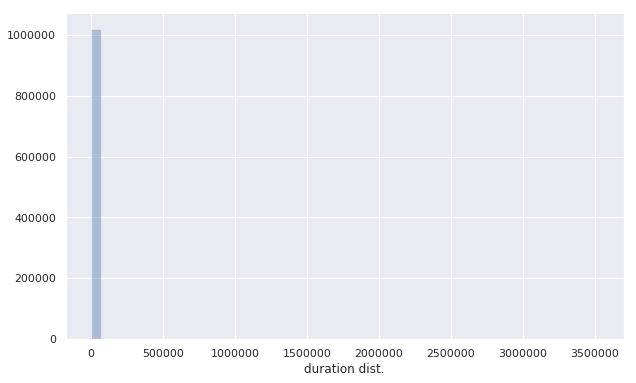

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(train["trip_duration"], kde=False, axlabel="duration dist.")

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ:** Масштаб различных наблюдений целевой функции сильно разнятся, распределение имеет длинный правый хвост, распределение похоже на логнормальное.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ:** Как видно на графике выше, масштаб значений целевой функции имеет большой разброс. При большой длительности поездки не так важен абсолютный размер ошибки оценки. Ошибка в пару минут при часовой поездки менее существенна, чем при поездки длительностью 5 минут. Таким образом при исследовании данной проблемы предпочтительней будет брать функцию потерь, зависящую от относительной ошибки. Функция потерь:
$$\text{L}(X, y, a) = \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2 = \big(\log{y_i + 1 \over a(x_i) + 1}\big)^2$$


На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: Так как $\hat{a}_i = \log{(a_i + 1)}$ , тогда MSE для модели $\hat{a}_i$ :
$$\text{MSE}(X, \hat{y}, \hat{a}) = \frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y_i} - \hat{a}(x_i)\big)^2 = \frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2 = MSLE(X, y, a).$$ Так как корень монотонная возрастающая функция, то минимизация MSLE эквивалента минимизации RMSLE.

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашим выборкам колонки `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке:

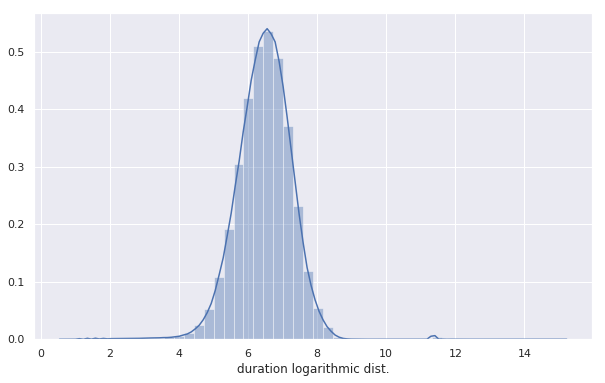

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(train["log_trip_duration"], axlabel="duration logarithmic dist.")

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
log_y_mean = np.ones(train["log_trip_duration"].shape[0]) * train["log_trip_duration"].mean()
np.sqrt(mean_squared_error(train["log_trip_duration"], log_y_mean))

0.7966786939115883

## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [ ]:
train.sort_values(by="pickup_datetime", inplace=True)
train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


vendor_id     pickup_datetime  ...  trip_duration  log_trip_duration
id                                        ...                                  
id1210365          2 2016-01-01 00:01:01  ...            408           6.013715
id3888279          1 2016-01-01 00:01:14  ...            280           5.638355
id0924227          1 2016-01-01 00:01:20  ...            736           6.602588
id2294362          2 2016-01-01 00:01:33  ...            712           6.569481
id1078247          2 2016-01-01 00:01:37  ...            114           4.744932

[5 rows x 10 columns]

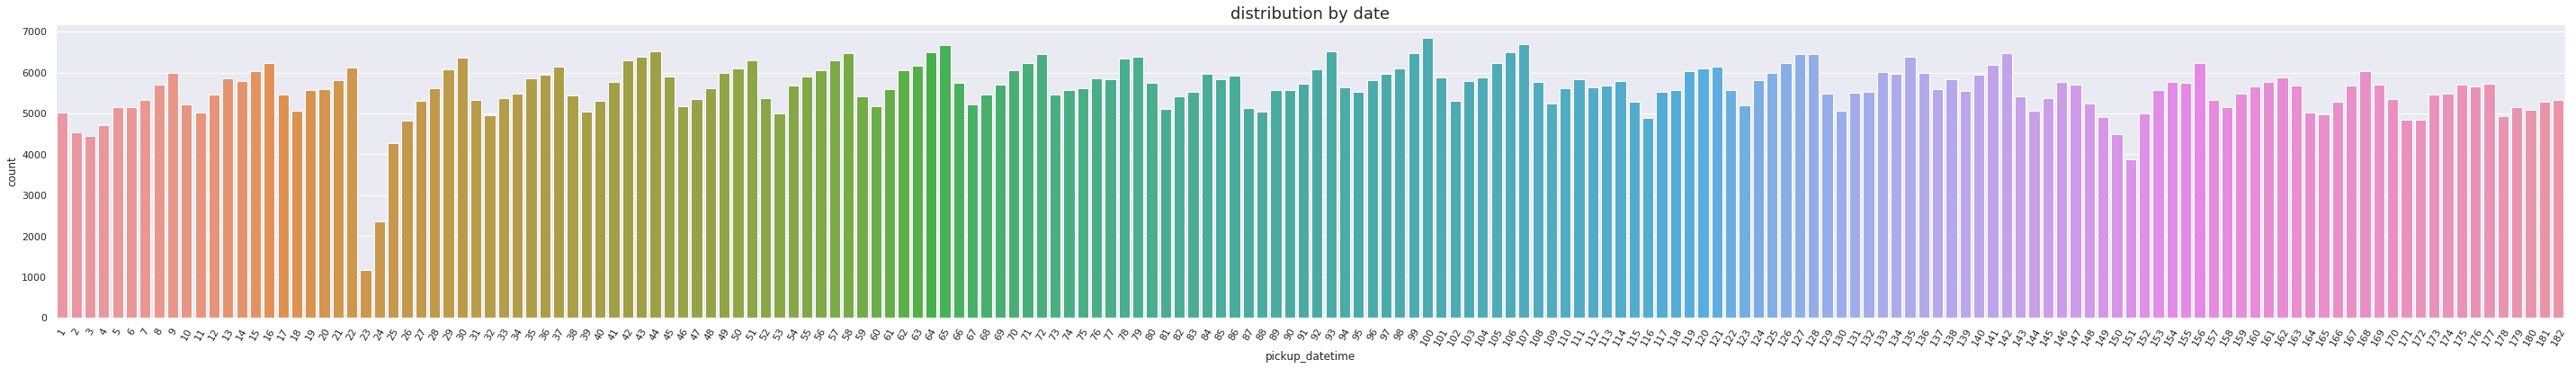

In [ ]:
to_plot = train["pickup_datetime"].dt.date
fig, ax = plt.subplots(figsize=(50,6))
plt.xticks(rotation=60)
ax.set_xlabel("date")
ax.set_ylabel("count")
ax.set_title("distribution by date", fontsize=18)
sns.countplot(to_plot)

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

**Ответ:** Аномально низкое колчиество поездок было совершено во время снегопада 22-23 января 2016 года, а так же 28-29 мая 2016 года в предверии дня поминания.

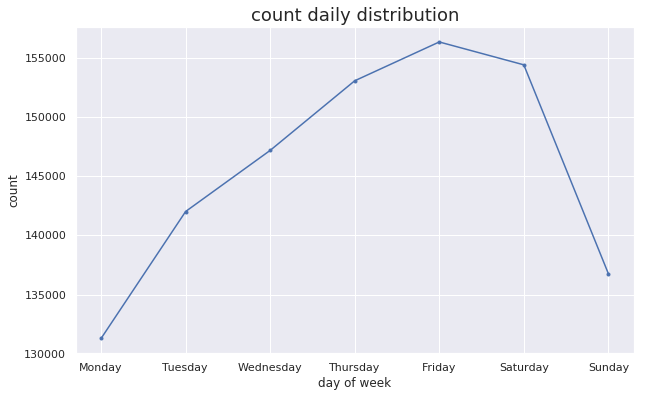

In [ ]:
to_plot = train["pickup_datetime"].groupby(by=train["pickup_datetime"].dt.dayofweek).count()
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("count daily distribution", fontsize=18)
ax.set_xlabel("day of week")
ax.set_ylabel("count")
plt.xticks(ticks=np.arange(7),
           labels=["Monday", "Tuesday", "Wednesday",
                   "Thursday", "Friday", "Saturday", "Sunday"])

ax.plot(to_plot.index, to_plot, "b.-")


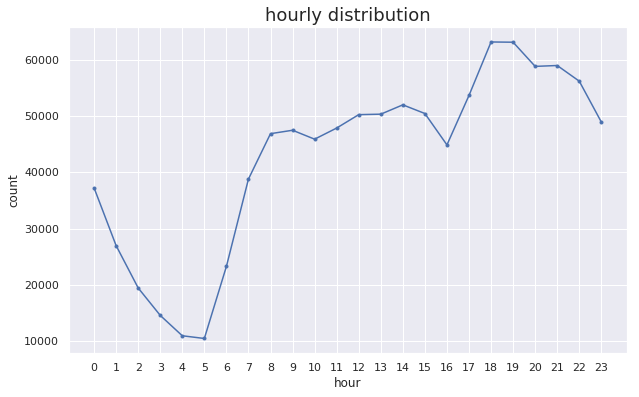

In [ ]:
to_plot = train["pickup_datetime"].groupby(by=train["pickup_datetime"].dt.hour).count()
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("hourly distribution", fontsize=18)
ax.set_xlabel("hour")
ax.set_ylabel("count")
plt.xticks(ticks=np.arange(24),
           labels=np.arange(24))

ax.plot(to_plot.index, to_plot, "b.-")


**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

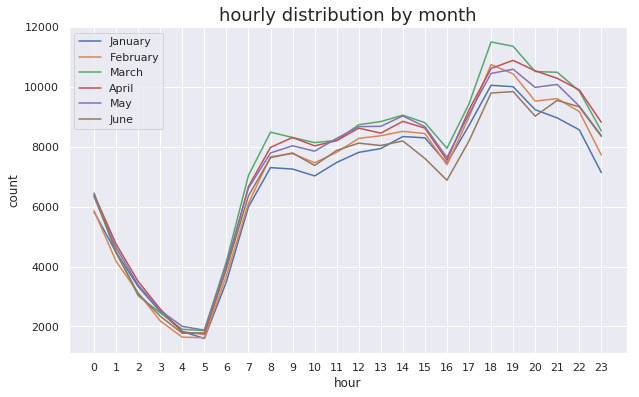

In [ ]:
to_plot = train["pickup_datetime"].groupby(by=[train["pickup_datetime"].dt.hour, train["pickup_datetime"].dt.month]).count().unstack()
fig, ax = plt.subplots(figsize=(10,6))

plt.xticks(np.arange(24), np.arange(24))
ax.set_title("hourly distribution by month", fontsize=18)
ax.set_xlabel("hour")
ax.set_ylabel("count")
ax.plot(to_plot.index, to_plot)

ax.legend(["January", "February", "March",  "April", "May", "June"])

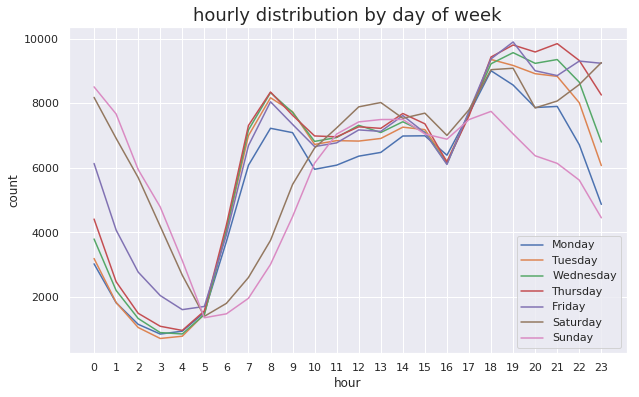

In [ ]:
to_plot = train["pickup_datetime"].groupby(by=[train["pickup_datetime"].dt.hour, train["pickup_datetime"].dt.dayofweek]).count().unstack()
fig, ax = plt.subplots(figsize=(10,6))
plt.xticks(np.arange(24), np.arange(24))
ax.set_title("hourly distribution by day of week", fontsize=18)
ax.set_xlabel("hour")
ax.set_ylabel("count")
ax.plot(to_plot.index, to_plot)

ax.legend(["Monday", "Tuesday", "Wednesday",  "Thursday", "Friday", "Saturday", "Sunday"])

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?
***Ответ*: в весенние месяцы количество поездок несколько превышает количество поездов в зимнии и летние месяцы после 8 часов утра. Тенденции в течении дня в целом не зависят от месяца.

В течении дня видно явное различие в тенденции поездок между будними днями и  выходными, при этом понедельник несколько выделяется по сравнению с остальными днями меньшей активностью в рабочее время. А субботний вечер больше похож на вечер буднего дня. В целом можно считать, что новый день начинается в 5 часов утра.

**Задание 4 (0.5 баллов)**. По *обучающей выборке* нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

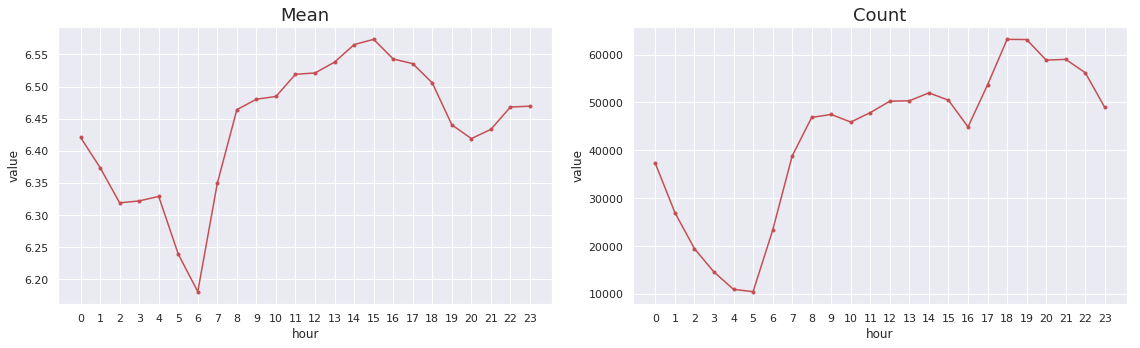

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 5))
axes[0].plot(train.groupby(by=train["pickup_datetime"].dt.hour)["log_trip_duration"].mean(), 'r.-')
axes[0].set_xlabel('hour')
axes[0].set_ylabel('value')
axes[0].set_title("Mean", fontsize = 18)

axes[1].plot(train.groupby(by=train["pickup_datetime"].dt.hour)["log_trip_duration"].count(), 'r.-')
axes[1].set_xlabel('hour')
axes[1].set_ylabel('value')
axes[1].set_title("Count", fontsize = 18)
plt.setp(axes, xticks=np.arange(24), xticklabels=np.arange(24))

fig.tight_layout()

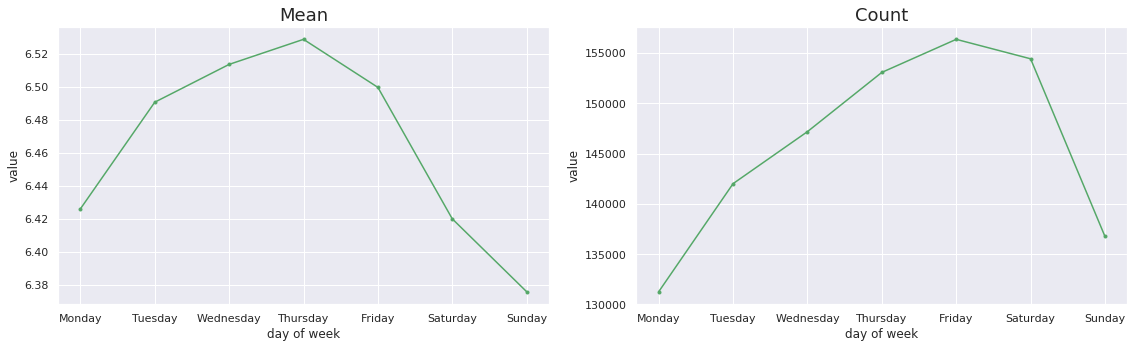

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 5))
axes[0].plot(train.groupby(by=train["pickup_datetime"].dt.dayofweek)["log_trip_duration"].mean(), 'g.-')
axes[0].set_xlabel('day of week')
axes[0].set_ylabel('value')
axes[0].set_title("Mean", fontsize = 18)
axes[1].plot(train.groupby(by=train["pickup_datetime"].dt.dayofweek)["log_trip_duration"].count(), 'g.-')
axes[1].set_xlabel('day of week')
axes[1].set_ylabel('value')
axes[1].set_title("Count", fontsize = 18)
plt.setp(axes, xticks=np.arange(7), xticklabels=["Monday", "Tuesday", "Wednesday",  "Thursday", "Friday", "Saturday", "Sunday"])

fig.tight_layout()

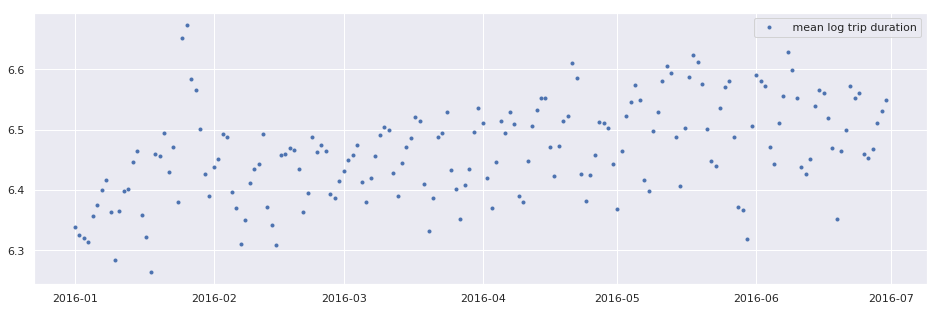

In [ ]:
a1 = train[train["pickup_datetime"].dt.dayofyear == 26]["log_trip_duration"].mean()
a2 = train[train["pickup_datetime"].dt.dayofyear == 151]["log_trip_duration"].mean()
to_plot = train.groupby(by=train["pickup_datetime"].dt.date)["log_trip_duration"].mean()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (16, 5))
axes.plot(to_plot, 'b.', label=" mean log trip duration")
axes.set_xlabel('day of year')
axes.set_ylabel('value')
axes.set_title("Mean log trip duration during year", fontsize = 18)

z = np.polyfit(np.arange(1, 183), to_plot, 1)
p = np.poly1d(z)
axes.plot(np.arange(1, 183),p(np.arange(1, 183)),"r--", label="trend line")
axes.annotate('January snowstorm', xy=(26, a1), xytext=(30, 6.6),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
axes.annotate('Memorial day', xy=(151, a2), xytext=(125, 6.3),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
axes.legend()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

In [ ]:
(train[((train["pickup_datetime"] < pd.to_datetime("2016-01-23 23:59:59", format='%Y-%m-%d %H:%M:%S')) &
                 (train["pickup_datetime"] > pd.to_datetime("2016-01-23 00:00:00", format='%Y-%m-%d %H:%M:%S')))]["log_trip_duration"].mean() -
 train[((train["pickup_datetime"].dt.dayofweek == 4)
       & (train["pickup_datetime"].dt.month == 1))]["log_trip_duration"].mean())

0.03724703227976711

In [ ]:
(train[((train["pickup_datetime"] < pd.to_datetime("2016-05-29 23:59:59", format='%Y-%m-%d %H:%M:%S')) &
                    (train["pickup_datetime"] > pd.to_datetime("2016-05-29 00:00:00", format='%Y-%m-%d %H:%M:%S')))]["log_trip_duration"].mean() -
 train[((train["pickup_datetime"].dt.dayofweek == 6)
       & (train["pickup_datetime"].dt.month == 5))]["log_trip_duration"].mean())


-0.03217240417333045

**Ответ:** В целом графики зависимости таргета от часа в сутках и дня недели похожи на графика количества поездок. Это может свидетельствовать о сильной корреляции ситуации на дороге(количетва машин, а следовательно наличие трафика) с таргетом. Но есть и различия, например наблюдается увеличении продолжительности поездки с 2 до 5 часов утра, при продолжающемся снижении количества поездок и с 16 часов, когда, предположительно, заканчивается рабочий день количество заказов такси увеличивается, но средняя длительность поездки сокращается. Возможное объяснение состоит в том, что люди едут не домой, а в развлекательные учреждения, которые находятся ближе, а в ночное время (с 2-5 часов ночи) возвращаются домой. Значение таргета от дня недели достигает пикового значения в четверг, в отличие от количества поездок которое растёт и в пятницу.

Во время январского снегопада длительность поездки выше, чем в тот же день недели на протяжении всего января. В майской аномалии напротив, среднее значение таргета ниже чем в аналогичные дни недели текущего месяца.

На графике явно прослеживается тренд на увеличения таргета в течении года.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [ ]:
train.columns

Index(['vendor_id', 'pickup_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'log_trip_duration'],
      dtype='object')

In [ ]:
train["day_of_week"] = train["pickup_datetime"].dt.dayofweek
train["month"] = train["pickup_datetime"].dt.month
train["hour"] = train["pickup_datetime"].dt.hour
train["day_of_year"] = train["pickup_datetime"].dt.dayofyear


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [ ]:
test["day_of_week"] = test["pickup_datetime"].dt.dayofweek
test["month"] = test["pickup_datetime"].dt.month
test["hour"] = test["pickup_datetime"].dt.hour
test["day_of_year"] = test["pickup_datetime"].dt.dayofyear

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [ ]:
mask_is_frozen = ((train["pickup_datetime"] < pd.to_datetime("2016-01-28 23:59:59", format='%Y-%m-%d %H:%M:%S')) &
                 (train["pickup_datetime"] > pd.to_datetime("2016-01-22 00:00:00", format='%Y-%m-%d %H:%M:%S')))
train["is_frozen"] = 0
train["is_frozen"].loc[mask_is_frozen] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

In [ ]:
mask_is_frozen_test = ((test["pickup_datetime"] < pd.to_datetime("2016-01-28 23:59:59", format='%Y-%m-%d %H:%M:%S')) &
                 (test["pickup_datetime"] > pd.to_datetime("2016-01-22 00:00:00", format='%Y-%m-%d %H:%M:%S')))
test["is_frozen"] = 0
test["is_frozen"].loc[mask_is_frozen_test] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

In [ ]:
mask_is_memorial = ((train["pickup_datetime"] < pd.to_datetime("2016-05-30 23:59:59", format='%Y-%m-%d %H:%M:%S')) &
                    (train["pickup_datetime"] > pd.to_datetime("2016-05-28 00:00:00", format='%Y-%m-%d %H:%M:%S')))
train["is_memorial"] = 0
train["is_memorial"].loc[mask_is_memorial] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

In [ ]:
mask_is_memorial_test = ((test["pickup_datetime"] < pd.to_datetime("2016-05-30 23:59:59", format='%Y-%m-%d %H:%M:%S')) &
                    (test["pickup_datetime"] > pd.to_datetime("2016-05-28 00:00:00", format='%Y-%m-%d %H:%M:%S')))
test["is_memorial"] = 0
test["is_memorial"].loc[mask_is_memorial_test] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Ответ:** Как категореальные признаки стоит рассматривать день недели и час в сутках, так как нельзя уставновить связь между действительным порядком этих показателей и степень лучшести для целевой функции. В то время как для дня в году виден тренд, который показывает, что чем день дальше от начала года, тем выше значение целевой переменной.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

In [ ]:
X_train = train[['day_of_week', 'month', 'hour', 'day_of_year', 'is_frozen','is_memorial']]
X_test = test[['day_of_week', 'month', 'hour', 'day_of_year', 'is_frozen','is_memorial']]
y_train = train["log_trip_duration"]
y_test = test["log_trip_duration"]

In [ ]:
numeric_features = ["month", "day_of_year"]
categorical = ['day_of_week', 'hour']

In [ ]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

In [ ]:
rmse(y_test, y_pred)

0.786930590178371

In [ ]:
model[-1].coef_

array([-0.04934853,  0.01582396,  0.0390539 ,  0.05437857,  0.032545  ,
       -0.05154156, -0.0957189 , -0.00826102, -0.04450479, -0.09323577,
       -0.08816734, -0.08848834, -0.20499309, -0.27594361, -0.10924646,
        0.00845427,  0.03116032,  0.04155248,  0.07826085,  0.08084299,
        0.09890638,  0.12469765,  0.13430873,  0.10613722,  0.09606669,
        0.0636106 , -0.00419316, -0.02763586, -0.01434873,  0.0198234 ,
        0.02038906, -0.02866994, -0.02613763,  0.01430998, -0.06911754,
       -0.02098089,  0.06013162])

## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [ ]:
from folium import Map, Circle, FeatureGroup, Marker, PolyLine

In [ ]:
def my_show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    center = (data[latitude_column].mean(), data[longitude_column].mean())
    result_map = Map(location=center, zoom_start=11)


    for _, row in data.iterrows():
        Circle(
            radius=200,   # metrs
            location=[row[latitude_column], row[longitude_column]],
            popup='Laurelhurst Park',
            color=None,
            fill=True,
            fill_color=color,
            fill_opacity=0.5
            ).add_to(result_map)
    return result_map

In [ ]:
my_show_circles_on_map(data.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [ ]:
my_show_circles_on_map(data.sample(1000), "dropoff_latitude", "dropoff_longitude", "red")

**Вопрос**: Какие две точки выделяются на карте?

**Ответ**: Аэропорт им. Кеннеди и аэропорт Ла-Гуардиа.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [ ]:
!pip install haversine

In [ ]:
from haversine import haversine

In [ ]:
train["haversine"] = train.apply(lambda row: haversine((row["pickup_latitude"], row["pickup_longitude"]),
                                                       (row["dropoff_latitude"], row["dropoff_longitude"])), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
test["haversine"] = test.apply(lambda row: haversine((row["pickup_latitude"], row["pickup_longitude"]),
                                                       (row["dropoff_latitude"], row["dropoff_longitude"])), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
train.head()

vendor_id     pickup_datetime  ...  is_memorial  haversine
id                                        ...                        
id1210365          2 2016-01-01 00:01:01  ...            0   2.170875
id3888279          1 2016-01-01 00:01:14  ...            0   0.770148
id0924227          1 2016-01-01 00:01:20  ...            0   2.474579
id2294362          2 2016-01-01 00:01:33  ...            0   9.173184
id1078247          2 2016-01-01 00:01:37  ...            0   0.289760

[5 rows x 17 columns]

In [ ]:
test.head()

vendor_id     pickup_datetime  ...  is_memorial  haversine
id                                        ...                        
id1845459          2 2016-01-30 13:59:33  ...            0   1.330530
id1850244          1 2016-05-10 07:03:25  ...            0   3.316428
id1087117          1 2016-02-27 00:19:34  ...            0   3.817574
id1749482          1 2016-05-17 12:24:04  ...            0   1.664468
id0030456          2 2016-05-05 18:50:28  ...            0   4.077971

[5 rows x 17 columns]

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [ ]:
train["log_haversine"] = np.log1p(train["haversine"])
train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


vendor_id     pickup_datetime  ...  haversine  log_haversine
id                                        ...                          
id1210365          2 2016-01-01 00:01:01  ...   2.170875       1.154007
id3888279          1 2016-01-01 00:01:14  ...   0.770148       0.571063
id0924227          1 2016-01-01 00:01:20  ...   2.474579       1.245473
id2294362          2 2016-01-01 00:01:33  ...   9.173184       2.319755
id1078247          2 2016-01-01 00:01:37  ...   0.289760       0.254456

[5 rows x 18 columns]

In [ ]:
test["log_haversine"] = np.log1p(test["haversine"])
test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


vendor_id     pickup_datetime  ...  haversine  log_haversine
id                                        ...                          
id1845459          2 2016-01-30 13:59:33  ...   1.330530       0.846096
id1850244          1 2016-05-10 07:03:25  ...   3.316428       1.462428
id1087117          1 2016-02-27 00:19:34  ...   3.817574       1.572270
id1749482          1 2016-05-17 12:24:04  ...   1.664468       0.980005
id0030456          2 2016-05-05 18:50:28  ...   4.077971       1.624912

[5 rows x 18 columns]

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [ ]:
np.corrcoef(train["log_trip_duration"], train["haversine"])[0, 1]

0.5560859143703881

In [ ]:
np.corrcoef(train["log_trip_duration"], train["log_haversine"])[0, 1]

0.7496681714827943

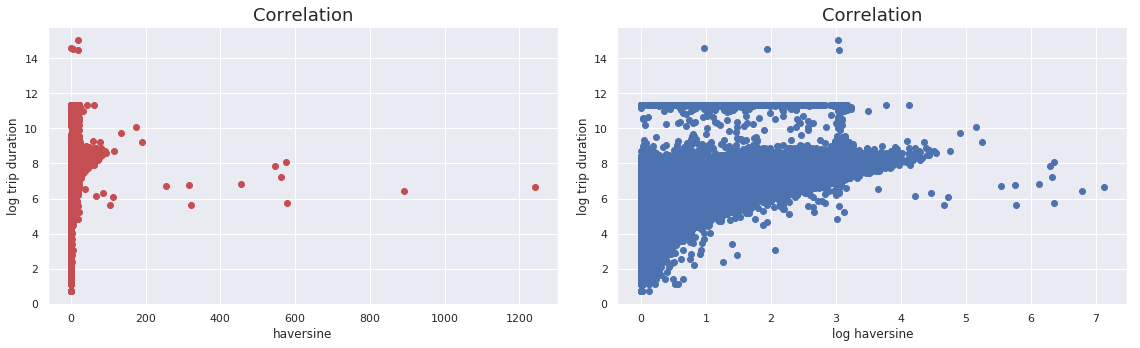

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 5))
axes[0].scatter(train["haversine"], train["log_trip_duration"], color="r")
axes[0].set_xlabel('haversine')
axes[0].set_ylabel('log trip duration')
axes[0].set_title("Correlation", fontsize = 18)

axes[1].scatter(train["log_haversine"], train["log_trip_duration"], color="b")
axes[1].set_xlabel('log haversine')
axes[1].set_ylabel('log trip duration')
axes[1].set_title("Correlation", fontsize = 18)


fig.tight_layout()

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [ ]:
train["speed"] = np.divide(train["haversine"], train["trip_duration"])
train["speed"].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


id
id1210365    0.005321
id3888279    0.002751
id0924227    0.003362
id2294362    0.012884
id1078247    0.002542
Name: speed, dtype: float64

Text(0.5, 1.0, 'Speed distribution')

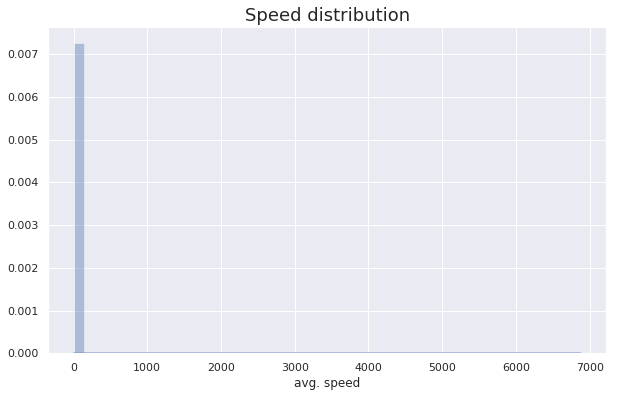

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(train["speed"] * 3600, axlabel="avg. speed")
plt.title("Speed distribution", fontsize=18)

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

Text(0.5, 1.0, 'Speed distribution w/o outlier')

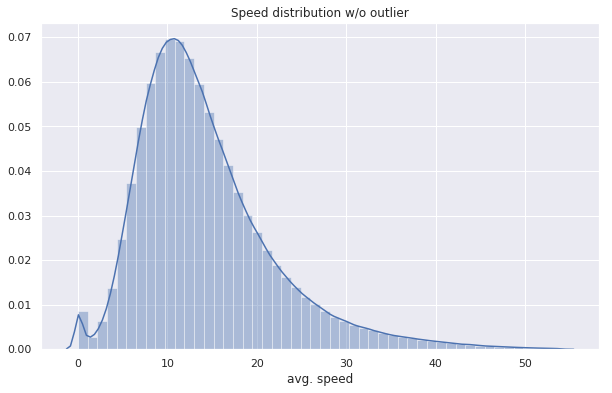

In [ ]:
q999 = np.quantile(train["speed"], 0.999)
to_plot =  train[train["speed"] < q999]["speed"]* 3600
plt.figure(figsize=(10,6))
sns.distplot(to_plot, axlabel="avg. speed")
plt.title("Speed distribution w/o outlier")

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [ ]:
to_plot = train.groupby(by=["day_of_week", "hour"])["speed"].median().unstack() * 3600

([<matplotlib.axis.YTick at 0x7f51088660f0>,
 <a list of 7 Text yticklabel objects>)

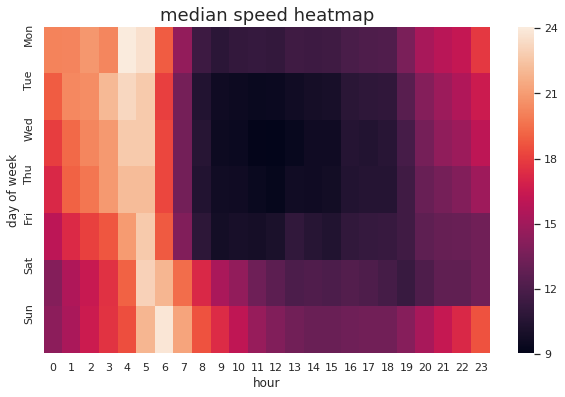

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(to_plot)
ax.set_title("median speed heatmap", fontsize=18)
ax.set_xlabel("hour")
ax.set_ylabel("day of week")
plt.yticks(np.arange(7), ["Mon", "Tue", "Wed",  "Thu", "Fri", "Sat", "Sun"])

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Скорость получена с использованием целевой функции.

In [ ]:
train.drop("speed", axis=1, inplace=True)
train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


vendor_id     pickup_datetime  ...  haversine  log_haversine
id                                        ...                          
id1210365          2 2016-01-01 00:01:01  ...   2.170875       1.154007
id3888279          1 2016-01-01 00:01:14  ...   0.770148       0.571063
id0924227          1 2016-01-01 00:01:20  ...   2.474579       1.245473
id2294362          2 2016-01-01 00:01:33  ...   9.173184       2.319755
id1078247          2 2016-01-01 00:01:37  ...   0.289760       0.254456

[5 rows x 18 columns]

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ:** В рабочее время в будни наименьшая скорость передвижения, вероятно это связано с пробками. Наибольшая скорость в утренние предрассветные часы.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [ ]:
mask_traffic = (train["day_of_week"] < 5) & (train["hour"] > 6) & (train["hour"] <20)
train["is_traffic"] = 0
train["is_traffic"].loc[mask_traffic] = 1

mask_traffic_test = (test["day_of_week"] < 5) & (test["hour"] > 6) & (test["hour"] <20)
test["is_traffic"] = 0
test["is_traffic"].loc[mask_traffic_test] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can a

In [ ]:
mask_free = (((train["day_of_week"] < 5) & (train["hour"] > 3) & (train["hour"] <5)) |
                ((train["day_of_week"] >= 5) & (train["hour"] > 4) & (train["hour"] < 6)))
train["is_free"] = 0
train["is_free"].loc[mask_free] = 1

mask_free_test = (((test["day_of_week"] < 5) & (test["hour"] > 3) & (test["hour"] <5)) |
                ((test["day_of_week"] >= 5) & (test["hour"] > 4) & (test["hour"] < 6)))
test["is_free"] = 0
test["is_free"].loc[mask_free_test] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки - аэропорты La Guardia и John F Kennedy. Для каждого из аэропортов добавьте в выборки два признака: началась ли поездка из этого аэропорта и закончилась ли поездка в этом аэропорту.

In [ ]:
mask_to_la_guardia = ((train["dropoff_latitude"] < 40.78) & (train["dropoff_latitude"] > 40.76) &
                      (train["dropoff_longitude"] < -73.85) & (train["dropoff_longitude"] > -73.89))
train["to_la_guardia"] = 0
train["to_la_guardia"].loc[mask_to_la_guardia] = 1

mask_to_kennedy = ((train["dropoff_latitude"] < 40.65) & (train["dropoff_latitude"] > 40.63) &
                      (train["dropoff_longitude"] < -73.76) & (train["dropoff_longitude"] > -73.80))
train["to_kennedy"] = 0
train["to_kennedy"].loc[mask_to_kennedy] = 1

mask_from_la_guardia = ((train["pickup_latitude"] < 40.78) & (train["pickup_latitude"] > 40.76) &
                      (train["pickup_longitude"] < -73.85) & (train["pickup_longitude"] > -73.89))
train["from_la_guardia"] = 0
train["from_la_guardia"].loc[mask_from_la_guardia] = 1

mask_from_kennedy = ((train["pickup_latitude"] < 40.65) & (train["pickup_latitude"] > 40.63) &
                      (train["pickup_longitude"] < -73.76) & (train["pickup_longitude"] > -73.80))
train["from_kennedy"] = 0
train["from_kennedy"].loc[mask_from_kennedy] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

In [ ]:
mask_to_la_guardia_test = ((test["dropoff_latitude"] < 40.78) & (test["dropoff_latitude"] > 40.76) &
                      (test["dropoff_longitude"] < -73.85) & (test["dropoff_longitude"] > -73.89))
test["to_la_guardia"] = 0
test["to_la_guardia"].loc[mask_to_la_guardia_test] = 1

mask_to_kennedy_test = ((test["dropoff_latitude"] < 40.65) & (test["dropoff_latitude"] > 40.63) &
                      (test["dropoff_longitude"] < -73.76) & (test["dropoff_longitude"] > -73.80))
test["to_kennedy"] = 0
test["to_kennedy"].loc[mask_to_kennedy_test] = 1

mask_from_la_guardia_test = ((test["pickup_latitude"] < 40.78) & (test["pickup_latitude"] > 40.76) &
                      (test["pickup_longitude"] < -73.85) & (test["pickup_longitude"] > -73.89))
test["from_la_guardia"] = 0
test["from_la_guardia"].loc[mask_from_la_guardia_test] = 1

mask_from_kennedy_test = ((test["pickup_latitude"] < 40.65) & (test["pickup_latitude"] > 40.63) &
                      (test["pickup_longitude"] < -73.76) & (test["pickup_longitude"] > -73.80))
test["from_kennedy"] = 0
test["from_kennedy"].loc[mask_from_kennedy_test] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

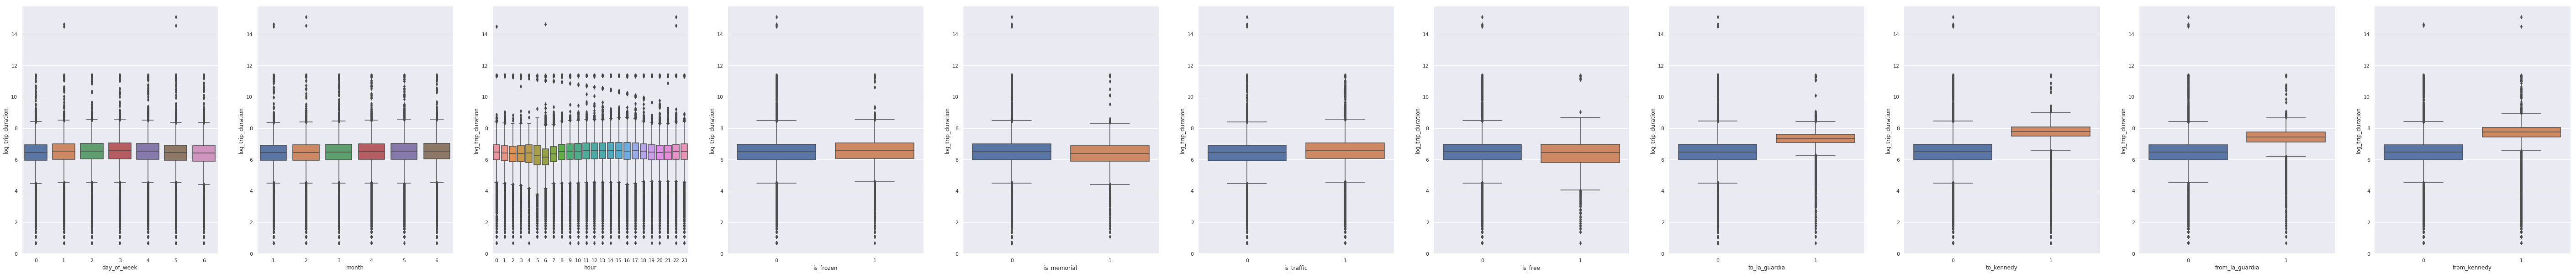

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=11, figsize = (100, 10))
for i, name in enumerate(['day_of_week', 'month', 'hour', 'is_frozen',
       'is_memorial', 'is_traffic', 'is_free',
       'to_la_guardia', 'to_kennedy', 'from_la_guardia', 'from_kennedy']):
  sns.boxplot(x=name, y="log_trip_duration", data=train, ax=axes[i])

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ:** Распределение наблюдений для признаков связаннх с Аэропортами значительно отличаются от остальных наблюдений. Для разных дней недели распределения так же значительно различаются, так же хорошим признаком выглядит час в течении дня, в отличии от месяца значение в котором практически не различаются от месяца к месяцу.
Распределение в Аномальные дни различаются от распределения в другие дни, а значит вероятно будут хорошими признаками.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [ ]:
def my_square_show(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    center = (data[latitude_column].mean(), data[longitude_column].mean())
    result_map = Map(location=center, zoom_start=11)


    for _, row in data.iterrows():
        Circle(
            radius=200,   # metrs
            location=[row[latitude_column], row[longitude_column]],
            popup='Laurelhurst Park',
            color=None,
            fill=True,
            fill_color=color,
            fill_opacity=0.5
            ).add_to(result_map)
    PolyLine([[40.7, -74.02],[40.7, -73.94]]).add_to(result_map) #low
    PolyLine([[40.7, -74.02],[40.8, -74.02]]).add_to(result_map) #left
    PolyLine([[40.8, -73.94],[40.7, -73.94]]).add_to(result_map) #right
    PolyLine([[40.8, -74.02],[40.8, -73.94]]).add_to(result_map) #top
    return result_map


In [ ]:
my_square_show(data.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
class MapGridTransformer(BaseEstimator, TransformerMixin):
  def __init__(self):
      self.lat_borders = np.linspace(40.7, 40.8, 5)
      self.long_borders = np.linspace(-74.02,-73.94, 4)

  def fit(self, X, y = None):
    return self



  def transform(self, X, y = None):
    def square(lat, long):
      lat_count = np.zeros(lat.shape[0])
      lat_count = lat_count + (9 * (lat > self.lat_borders[0]) - 3 * (lat > self.lat_borders[1]) - 3  * (lat > self.lat_borders[2]) - 3 * (lat > self.lat_borders[3]))
      long_count = np.zeros(long.shape[0])
      long_count = long_count + (1 * (long > self.long_borders[0]) + 1 * (long > self.long_borders[1]) + 1 * (long > self.long_borders[2]))
      return (lat_count + long_count) * (long < self.long_borders[3]) * (lat < self.lat_borders[4])


    new_X = X.copy()
    new_X["pickup_square"] = -1
    new_X["dropoff_square"] = -1
    new_X["pickup_square"] =  new_X["pickup_square"] + square(new_X["pickup_latitude"], new_X["pickup_longitude"])
    new_X["dropoff_square"] = new_X["dropoff_square"] + square(new_X["dropoff_latitude"], new_X["dropoff_longitude"])
    return new_X

In [ ]:
trans = MapGridTransformer()
train_trans = trans.fit_transform(train)
train_trans[train_trans["pickup_square"] != -1].sample(5)

vendor_id     pickup_datetime  ...  pickup_square  dropoff_square
id                                        ...                               
id2807742          1 2016-05-23 10:31:10  ...            4.0             7.0
id1418163          2 2016-04-01 23:05:04  ...            4.0            -1.0
id0542572          1 2016-04-20 17:36:52  ...            4.0             6.0
id2671709          2 2016-06-19 09:49:15  ...            7.0             4.0
id3043882          1 2016-01-30 16:24:29  ...           10.0             6.0

[5 rows x 26 columns]

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, численные признаки отмасштабируйте.

In [ ]:
class FeatureSelector(BaseEstimator, TransformerMixin):

    def __init__( self, feature_names ):
        self._feature_names = feature_names


    def fit( self, X, y = None ):
        return self


    def transform(self, X, y = None ):
        return X[self._feature_names ]

In [ ]:
train.columns

Index(['vendor_id', 'pickup_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'log_trip_duration',
       'day_of_week', 'month', 'hour', 'day_of_year', 'is_frozen',
       'is_memorial', 'haversine', 'log_haversine', 'is_traffic', 'is_free',
       'to_la_guardia', 'to_kennedy', 'from_la_guardia', 'from_kennedy'],
      dtype='object')

In [ ]:
X_mask = ['day_of_week', 'month', 'hour', 'day_of_year', 'is_frozen',
                 'is_memorial', 'is_traffic', 'is_free', 'to_la_guardia',
                 'to_kennedy', 'from_la_guardia', 'from_kennedy',
                 "pickup_square",	"dropoff_square", "log_haversine"]

y_train = train["log_trip_duration"]
y_test = test["log_trip_duration"]

numeric_features = ["month", "day_of_year", "log_haversine"]
categorical = ['day_of_week', 'hour', "pickup_square",	"dropoff_square"]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('squares', MapGridTransformer()),
    ('feature_selector', FeatureSelector(X_mask)),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(train, y_train)
y_pred = model.predict(test)

In [ ]:
rmse(y_test, y_pred)

0.4806279848042088

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

**Ответ:** vendor_id может быть полезен из-за специализации различных перевозчиков, в том смысле, что клиенты заказывают, как правило такси у одного и того же проверенного ими перевозчика и едут по своему одинаковому маршруту.

passenger_count компании разных размеров скорее всего будут иметь разные цели поездки.

store_and_fwd_flag возможно информация сохраняется если не могла быть отправлена сразу, то есть у машины не было связи, а значит она высадила пассажира в определённом районе в котором нет связи.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)
pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held
in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

trip_duration - duration of the trip in seconds

In [ ]:
train.columns

Index(['vendor_id', 'pickup_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'log_trip_duration',
       'day_of_week', 'month', 'hour', 'day_of_year', 'is_frozen',
       'is_memorial', 'haversine', 'log_haversine', 'is_traffic', 'is_free',
       'to_la_guardia', 'to_kennedy', 'from_la_guardia', 'from_kennedy'],
      dtype='object')

In [ ]:
train[["vendor_id", "passenger_count", "store_and_fwd_flag"]].nunique()

vendor_id             2
passenger_count       9
store_and_fwd_flag    2
dtype: int64

In [ ]:
train.groupby(by="passenger_count")["vendor_id"].count()

passenger_count
0        37
1    723402
2    147353
3     42068
4     19912
5     54526
6     33748
7         3
8         1
Name: vendor_id, dtype: int64

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

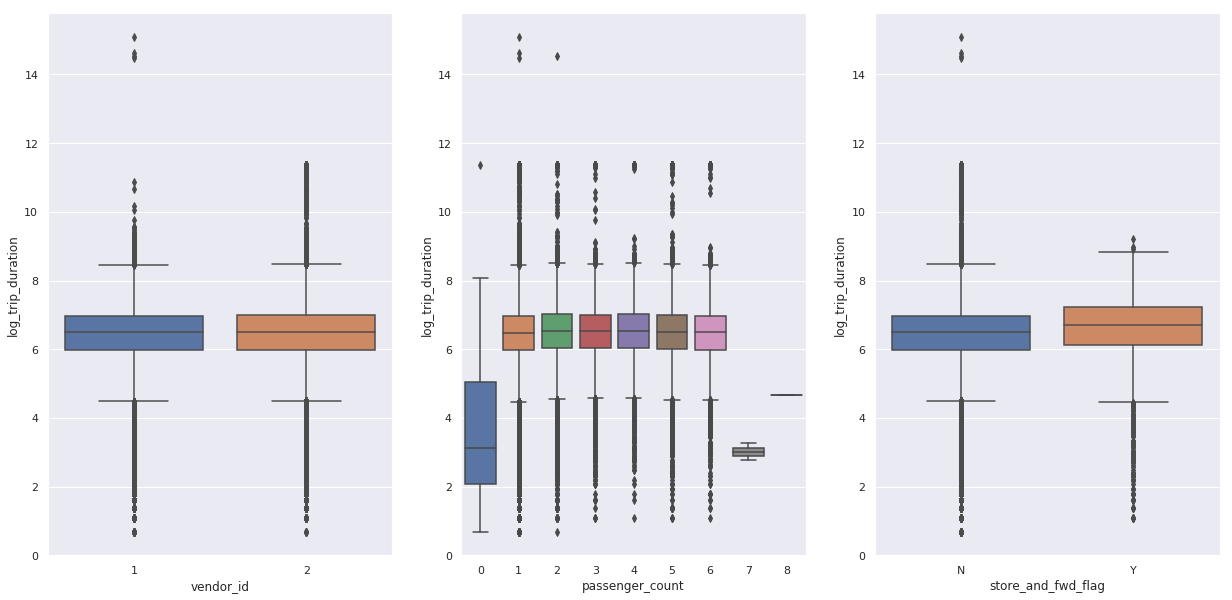

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (21, 10))
for i, name in enumerate(["vendor_id", "passenger_count", "store_and_fwd_flag"]):
  sns.boxplot(x=name, y="log_trip_duration", data=train, ax=axes[i])

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
train["store_and_fwd_flag"] = le.fit_transform(train["store_and_fwd_flag"])
test["store_and_fwd_flag"] = le.fit(test["store_and_fwd_flag"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
train["vendor_id"] = train["vendor_id"] - 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test["vendor_id"] = test["vendor_id"] - 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ:** распределения для различных по количеству групп пасажиров сильно отличается, одиночные пассажиры едут гораздо меньшее по времени в сравнении со средними группами 2-6 чаловек. Большие группы так же отличаются от средних.

Для машин которое хранят или не хранят данные перед отправкой, так же видно значительная разница в распределении.

У разных перевозчиков распределения похожи и скорее всего это не будет хорошим признаком.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [ ]:
train.head(5)

vendor_id     pickup_datetime  ...  from_la_guardia  from_kennedy
id                                        ...                               
id1210365          1 2016-01-01 00:01:01  ...                0             0
id3888279          0 2016-01-01 00:01:14  ...                0             0
id0924227          0 2016-01-01 00:01:20  ...                0             0
id2294362          1 2016-01-01 00:01:33  ...                0             0
id1078247          1 2016-01-01 00:01:37  ...                0             0

[5 rows x 24 columns]

In [ ]:
from tqdm import tqdm

In [ ]:
X_mask = ['day_of_week', 'month', 'hour', 'day_of_year', 'is_frozen',
                 'is_memorial', 'is_traffic', 'is_free', 'to_la_guardia',
                 'to_kennedy', 'from_la_guardia', 'from_kennedy',
                 "pickup_square",	"dropoff_square",
                 "vendor_id", "passenger_count", "store_and_fwd_flag", "log_haversine"]

y_train = train["log_trip_duration"]
y_test = test["log_trip_duration"]

numeric_features = ["month", "day_of_year", "log_haversine"]
categorical = ['day_of_week', 'hour', "pickup_square",	"dropoff_square", "passenger_count"]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('squares', MapGridTransformer()),
    ('feature_selector', FeatureSelector(X_mask)),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model_decl = pipeline.fit(train, y_train)
y_pred_decl = model_decl.predict(test)

In [ ]:
rmse(y_test, y_pred_decl)

0.48023905999157795

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Text(0.5, 1.0, 'trip duration distribution w/o outliers')

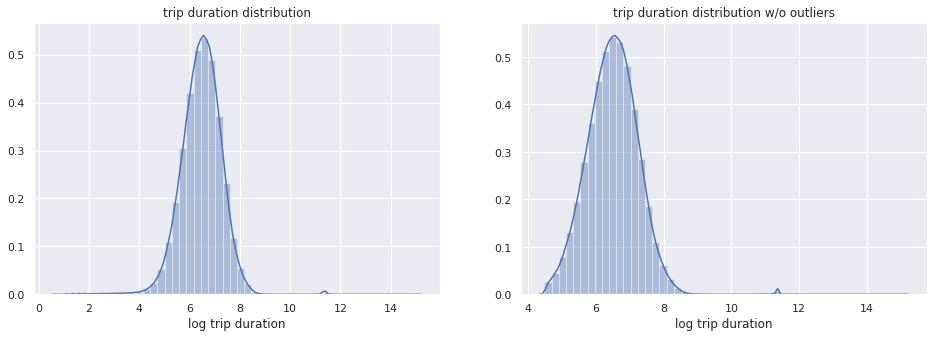

In [ ]:
q001 = np.quantile(train["log_trip_duration"], 0.01)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 5))
sns.distplot(train["log_trip_duration"], axlabel="log trip duration", ax=axes[0])
axes[0].set_title("trip duration distribution")
sns.distplot(train[train["log_trip_duration"] > q001]["log_trip_duration"], axlabel="log trip duration", ax=axes[1])
axes[1].set_title("trip duration distribution w/o outliers")

Text(0.5, 1.0, 'haversine distribution w/o outliers')

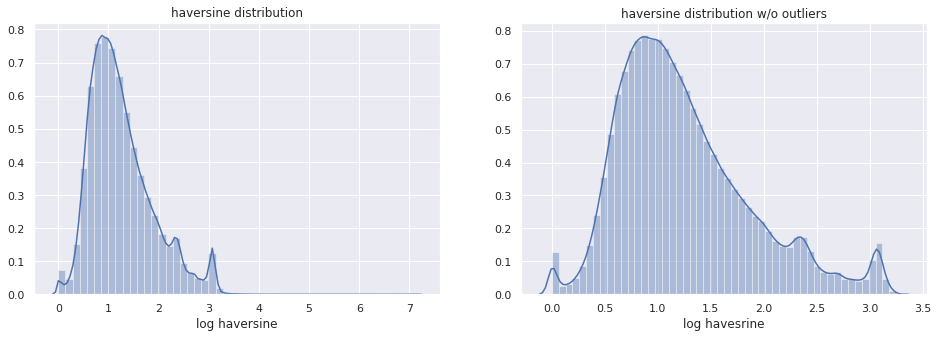

In [ ]:
q999 = np.quantile(train["log_haversine"], 0.999)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 5))
sns.distplot(train["log_haversine"], axlabel="log haversine", ax=axes[0])
axes[0].set_title("haversine distribution")
sns.distplot(train[train["log_haversine"] < q999]["log_haversine"], axlabel="log havesrine", ax=axes[1])
axes[1].set_title("haversine distribution w/o outliers")

Text(0.5, 1.0, 'error distribution w/o outliers')

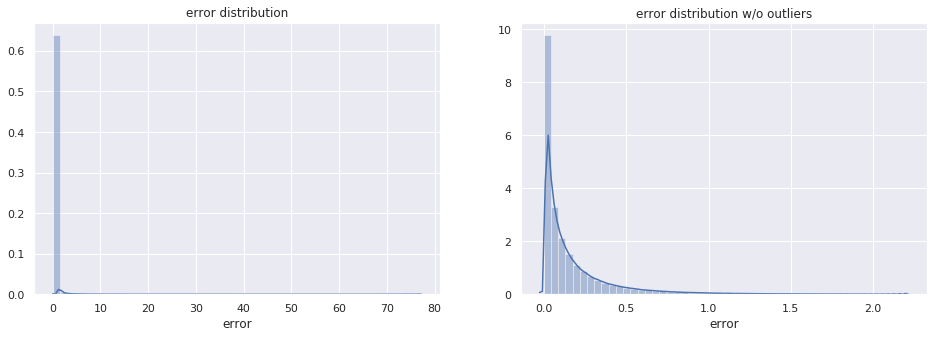

In [ ]:
error = (y_train - model.predict(train)) ** 2
q99 = np.quantile(error, 0.99)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 5))
sns.distplot(error, axlabel="error", ax=axes[0])
axes[0].set_title("error distribution")
sns.distplot(error[error < q99], axlabel="error", ax=axes[1])
axes[1].set_title("error distribution w/o outliers")

In [ ]:
train_X_mask = ((train["log_trip_duration"] > np.quantile(train["log_trip_duration"], 0.01)) &
                (train["log_haversine"] < np.quantile(train["log_haversine"], 0.999)) &
                (error < np.quantile(error, 0.99)))

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [ ]:
train[["is_frozen", "is_memorial", 'is_traffic', 'is_free', 'to_la_guardia', 'to_kennedy', 'from_la_guardia', 'from_kennedy']].sum()

is_frozen           29676
is_memorial         13280
is_traffic         483919
is_free              7925
to_la_guardia       12899
to_kennedy           8309
from_la_guardia     25895
from_kennedy        21995
dtype: int64

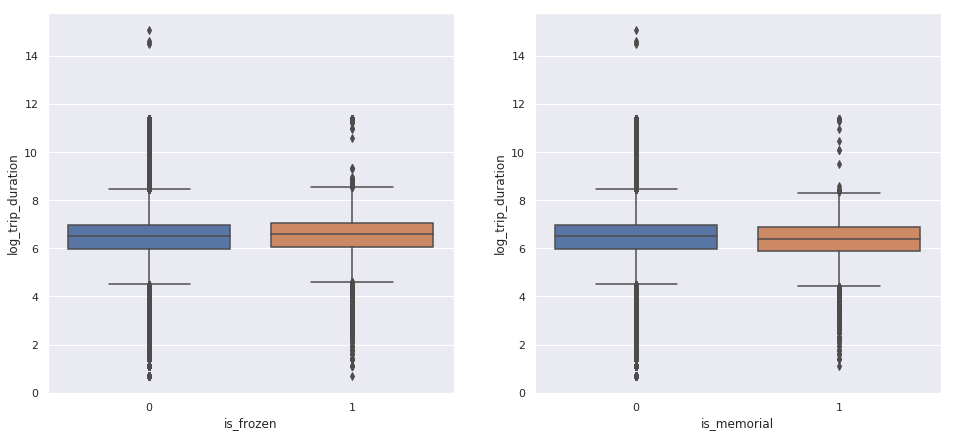

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 7))
for i, name in enumerate(["is_frozen", "is_memorial"]):
  sns.boxplot(x=name, y="log_trip_duration", data=train, ax=axes[i])

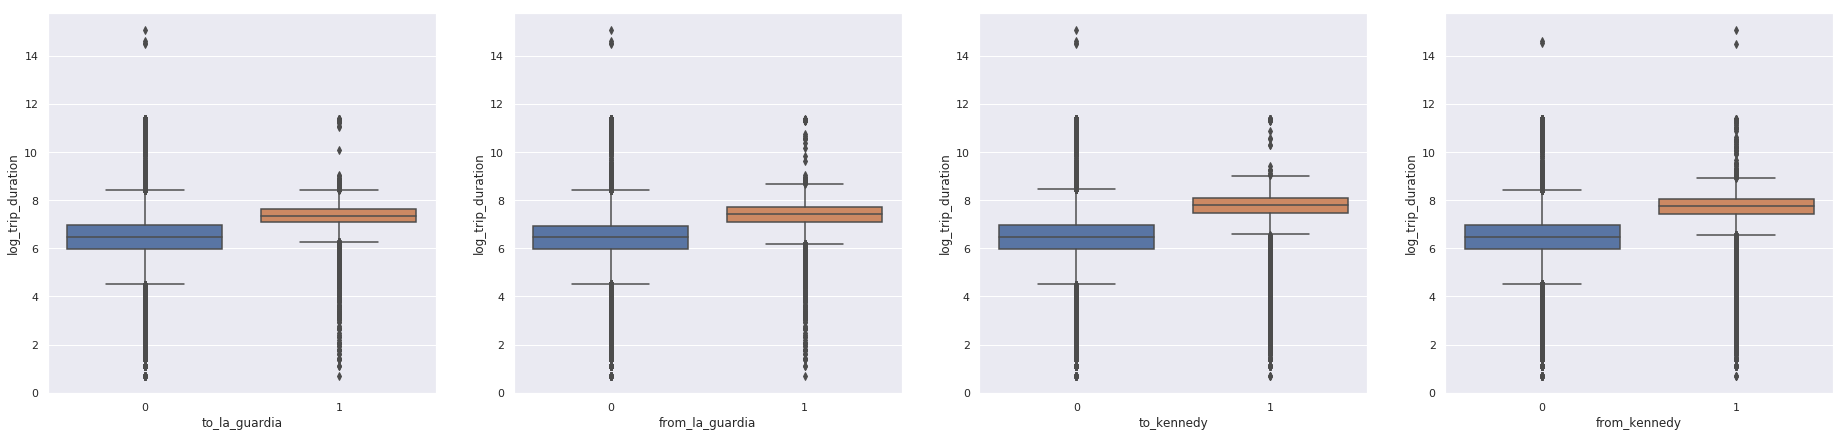

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize = (32, 7))
for i, name in enumerate([ 'to_la_guardia','from_la_guardia', 'to_kennedy', 'from_kennedy']):
  sns.boxplot(x=name, y="log_trip_duration", data=train, ax=axes[i])

In [ ]:
train["kennedy"] = (train["to_kennedy"] == 1) & (train["from_kennedy"] == 1)
test["kennedy"] = (test["to_kennedy"] == 1) & (test["from_kennedy"] == 1)
train["la_guardia"] = (train["to_la_guardia"] == 1) & (train["from_la_guardia"] == 1)
test["la_guardia"] = (test["to_la_guardia"] == 1) & (test["from_la_guardia"] == 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [ ]:
train.columns

Index(['vendor_id', 'pickup_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'log_trip_duration',
       'day_of_week', 'month', 'hour', 'day_of_year', 'is_frozen',
       'is_memorial', 'haversine', 'log_haversine', 'is_traffic', 'is_free',
       'to_la_guardia', 'to_kennedy', 'from_la_guardia', 'from_kennedy',
       'is_forsmajor', 'kennedy', 'la_guardia'],
      dtype='object')

In [ ]:
X_mask = ['day_of_week', 'month', 'hour', 'day_of_year', "is_frozen", "is_memorial",
          'is_traffic', 'is_free', "kennedy", "la_guardia",
          "pickup_square",	"dropoff_square", "log_haversine"]

y_train = train["log_trip_duration"]
y_test = test["log_trip_duration"]

numeric_features = ["month", "day_of_year", "log_haversine"]
categorical = ['day_of_week', 'hour', "pickup_square",	"dropoff_square"]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('squares', MapGridTransformer()),
    ('feature_selector', FeatureSelector(X_mask)),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(train[train_X_mask], y_train[train_X_mask])
y_pred = model.predict(test)

In [ ]:
rmse(y_test, y_pred)

0.48118143295550925

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [ ]:
square = MapGridTransformer()
feature_sel = FeatureSelector(X_mask)
A = square.fit_transform(train)
B = feature_sel.fit_transform(A)
B.shape[1]

13

In [ ]:
column_transformer.fit_transform(B).shape[1]

60

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Стало ли лучше?

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
X_mask = ['day_of_week', 'month', 'hour', 'day_of_year', "is_frozen", "is_memorial",
          'is_traffic', 'is_free', "kennedy", "la_guardia",
          "pickup_square",	"dropoff_square", "log_haversine"]

y_train = train["log_trip_duration"]
y_test = test["log_trip_duration"]

numeric_features = ["month", "day_of_year", "log_haversine"]
categorical = ['day_of_week', 'hour', "pickup_square",	"dropoff_square"]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline_lasso = Pipeline(steps=[
    ('squares', MapGridTransformer()),
    ('feature_selector', FeatureSelector(X_mask)),
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = pipeline_lasso.fit(train[train_X_mask], y_train[train_X_mask])
y_pred = model.predict(test)

In [ ]:
rmse(y_test, y_pred)

0.7937826521913581

In [ ]:
np.sum(pipeline_lasso.steps[-1][-1].coef_ == 0)

60

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальное значение параметра регуляризации (по логарифмической сетке), на тестовой выборке измерьте качество полученной модели.

In [ ]:
pipe= Pipeline(steps=[
    ('squares', MapGridTransformer()),
    ('feature_selector', FeatureSelector(X_mask)),
    ('ohe_and_scaling', column_transformer)
])
X = pipe.fit_transform(train[train_X_mask])

In [ ]:
train_X, valid_X, train_y, valid_y  = train_test_split(X, y_train[train_X_mask], test_size=0.2, random_state=42)

In [ ]:
mrse_HO = []
zeros = []
alphas = np.logspace(-5, 1, 10)
for i in tqdm(alphas):
  reg = Lasso(alpha=i)
  reg.fit(train_X, train_y)
  pred_y = reg.predict(valid_X)
  mrse_HO.append(rmse(valid_y, pred_y))
  zeros.append(np.sum(reg.coef_ == 0))

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2631.4183280656143, tolerance: 40.846040084308356
  max_iter, tol, rng, random, positive)
100%|██████████| 10/10 [06:24<00:00, 13.37s/it]


Text(0.5, 1.0, 'number of zeros')

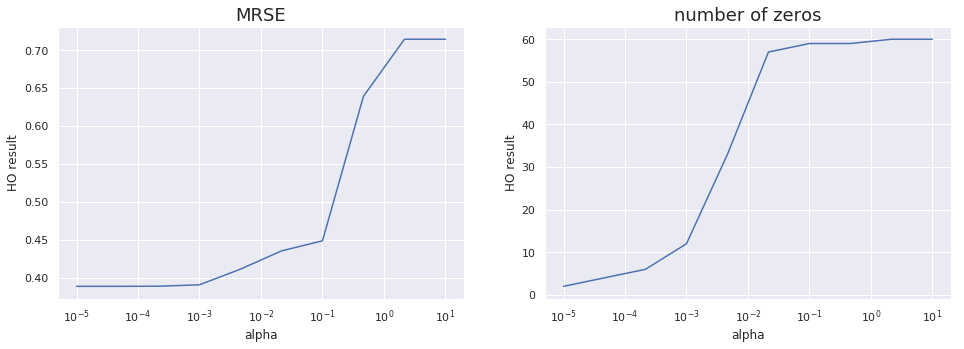

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 5))
axes[0].plot(alphas, mrse_HO)
axes[1].plot(alphas, zeros)
axes[0].set_xscale("log")
axes[1].set_xscale("log")
axes[0].set_xlabel("alpha")
axes[1].set_xlabel("alpha")
axes[0].set_ylabel("HO result")
axes[1].set_ylabel("HO result")
axes[0].set_title("MRSE", fontsize=18)
axes[1].set_title("number of zeros", fontsize=18)

Для каждого перебранного `alpha` посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`.

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими редкими парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

**Ответ:** Данный признак помогает понять путь из одной точки в другой, так как мы не знаем точного расстояния, маршрута и наличия-отсутсвия светофоров и конктреных особенностей пути из одного сектора в другой, мы можем их учесть введя данную переменную. Линейная модель рассматривает начало и конец пути независимо и придаёт вес каждому сектору, в который могут приезжать такси из разных секторов и уезжать в них. Так что мы не сможем учесть нужные нам признаки, а именно путь и его особенности.

In [ ]:
square = MapGridTransformer()
train_wo = square.fit_transform(train[train_X_mask]) #train with out outlier
test_new = square.transform(test)

In [ ]:
train_wo["path"] = list(zip(train_wo["pickup_square"], train_wo["dropoff_square"]))
test_new["path"] = list(zip(test_new["pickup_square"], test_new["dropoff_square"]))

In [ ]:
sorted_square = sorted(train_wo.groupby(by="path")["path"].count().to_dict().items(), key=lambda x: x[1], reverse=True)
square_dict = {}
for i, row in enumerate(sorted_square):
  if i < 100:
    square_dict[str(row[0])] = i + 1
  else:
    square_dict[str(row[0])] = -1

In [ ]:
train_wo["path"] = train_wo["path"].apply(lambda x: str(x))
test_new["path"] = test_new["path"].apply(lambda x: str(x))

In [ ]:
train_wo["path"] = train_wo["path"].replace(to_replace=square_dict)
test_new["path"] = test_new["path"].replace(to_replace=square_dict)

Переобучите модель на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
X_mask = ['day_of_week', 'month', 'hour', 'day_of_year', "is_frozen", "is_memorial",
          'is_traffic', 'is_free', "kennedy", "la_guardia",
          "path", "log_haversine"]

y_train = train["log_trip_duration"]
y_test = test["log_trip_duration"]

numeric_features = ["month", "day_of_year", "log_haversine"]
categorical = ['day_of_week', 'hour', "path"]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline_lasso = Pipeline(steps=[
    ('feature_selector', FeatureSelector(X_mask)),
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(alpha=0.001))
])

model = pipeline_lasso.fit(train_wo, y_train[train_X_mask])
y_pred = model.predict(test_new)

In [ ]:
rmse(y_test, y_pred)

0.4833200188174196

<img src="https://github.com/VolkovMaxim/hue/blob/master/mlmap.png?raw=true" width="30%" align="right" style="margin-left: 20px">

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

**Ответ:** Так как улицы Манхеттено похожи на координатную сетку, поэтому проезд по улицам будет происходить по этой координатной сетке, а значит истенное расстояние пути будет равно манххетоновскому расстоянию.

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [ ]:
sin = 0.807391
cos = 0.590017
qwe = train_wo.sample(1)
x1 = "pickup_longitude"
x2 = "dropoff_longitude"
y1 = "pickup_latitude"
y2 = "dropoff_latitude"

In [ ]:
train_wo["mid_way_long"] = (train_wo[x1] * cos + train_wo[y1] * sin) * cos - (train_wo[y2] * cos - train_wo[x2] * sin) * sin
train_wo["mid_way_lat"] = (train_wo[x1] * cos + train_wo[y1] * sin) * sin + (train_wo[y2] * cos - train_wo[x2] * sin) * cos

In [ ]:
test_new["mid_way_long"] = (test_new[x1] * cos + test_new[y1] * sin) * cos - (test_new[y2] * cos - test_new[x2] * sin) * sin
test_new["mid_way_lat"] = (test_new[x1] * cos + test_new[y1] * sin) * sin + (test_new[y2] * cos - test_new[x2] * sin) * cos

In [ ]:
test_new["math"] = test_new.apply(lambda row: haversine((row["pickup_latitude"], row["pickup_longitude"]),
                                                       (row["mid_way_lat"], row["mid_way_long"])) +
                                   haversine((row["mid_way_lat"], row["mid_way_long"]),
                                                       (row["dropoff_latitude"], row["dropoff_longitude"])), axis=1)

In [ ]:
qwe = train_wo.sample(1)
a, b, c, d, e, f = qwe["pickup_latitude"][0], qwe["pickup_longitude"][0], qwe["dropoff_latitude"][0], qwe["dropoff_longitude"][0], qwe["mid_way_lat"][0], qwe["mid_way_long"][0]
result_map = Map(location=(e, f), zoom_start=13)
PolyLine([[a, b],[e, f]]).add_to(result_map)
PolyLine([[c, d],[e, f]]).add_to(result_map)
result_map

In [ ]:
result_map = Map(location=(40.8, -74), zoom_start=12)
PolyLine([[40.800339, -73.958188],[40.76141636697591, -73.98666128743375]], color="red", weight=10).add_to(result_map)
PolyLine([[40.742048, -73.960152],[40.76141636697591, -73.98666128743375]], weight=10).add_to(result_map)
result_map

In [ ]:
train_wo["log_math"] = np.log1p(train_wo["math"])

In [ ]:
test_new["log_math"] = np.log1p(test_new["math"])

In [ ]:
np.corrcoef(train_wo["math"], train_wo["log_trip_duration"])[0, 1]

0.6747271688501089

In [ ]:
np.corrcoef(train_wo["log_math"], train_wo["log_trip_duration"])[0, 1]

0.7990613180291735

In [ ]:
np.corrcoef(train_wo["log_haversine"], train_wo["log_trip_duration"])[0, 1]

0.7897953589357931

In [ ]:
np.corrcoef(train_wo["log_math"], train_wo["log_haversine"])[0, 1]

0.9860581058665745

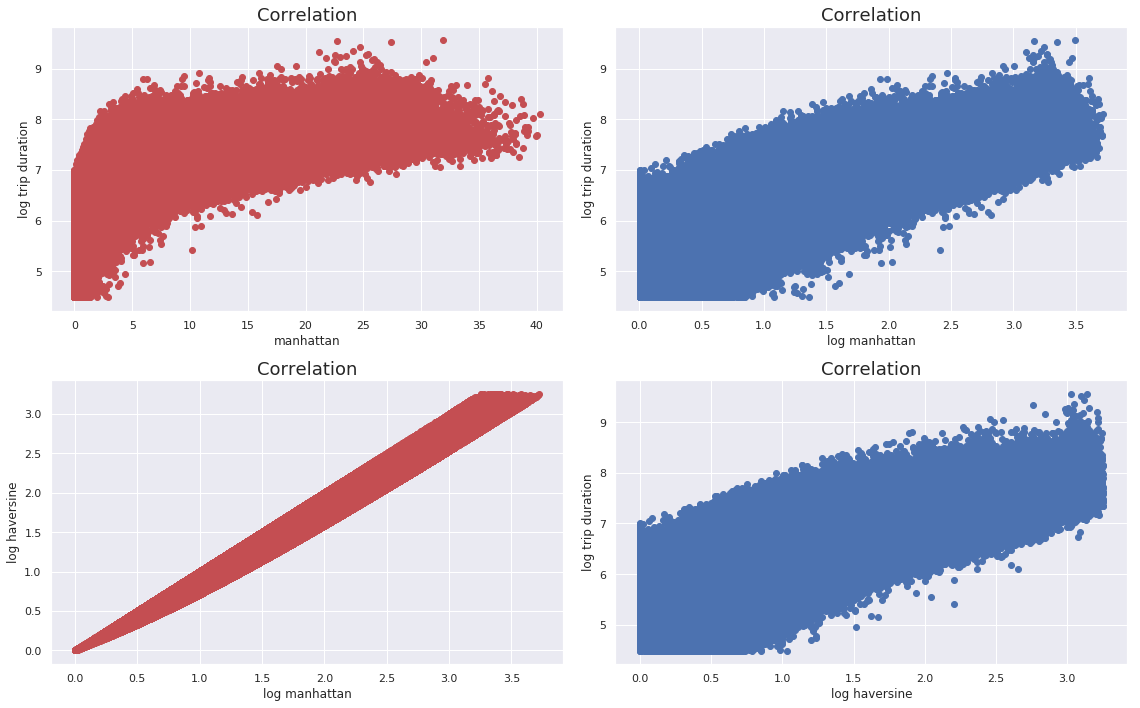

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (16, 10))
axes[0][0].scatter(train_wo["math"], train_wo["log_trip_duration"], color="r")
axes[0][0].set_xlabel('manhattan')
axes[0][0].set_ylabel('log trip duration')
axes[0][0].set_title("Correlation", fontsize = 18)

axes[0][1].scatter(train_wo["log_math"], train_wo["log_trip_duration"], color="b")
axes[0][1].set_xlabel('log manhattan')
axes[0][1].set_ylabel('log trip duration')
axes[0][1].set_title("Correlation", fontsize = 18)

axes[1][0].scatter(train_wo["log_math"], train_wo["log_haversine"], color="r")
axes[1][0].set_xlabel('log manhattan')
axes[1][0].set_ylabel('log haversine')
axes[1][0].set_title("Correlation", fontsize = 18)

axes[1][1].scatter(train_wo["log_haversine"], train_wo["log_trip_duration"], color="b")
axes[1][1].set_xlabel('log haversine')
axes[1][1].set_ylabel('log trip duration')
axes[1][1].set_title("Correlation", fontsize = 18)

fig.tight_layout()

Переобучите модель на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
X_mask = ['day_of_week', 'month', 'hour', 'day_of_year', "is_forsmajor",
          'is_traffic', 'is_free', "kennedy", "la_guardia",
          "path", "log_math"]

y_train = train["log_trip_duration"]
y_test = test["log_trip_duration"]

numeric_features = ["month", "day_of_year", "log_math"]
categorical = ['day_of_week', 'hour', "path"]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline_lasso = Pipeline(steps=[
    ('feature_selector', FeatureSelector(X_mask)),
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(alpha=0.001))
])

model = pipeline_lasso.fit(train_wo, y_train[train_X_mask])
y_pred = model.predict(test_new)

In [ ]:
rmse(y_test, y_pred)

0.47255901399110967